In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skrf as rf
import control
import control.matlab

In [2]:
freq = rf.Frequency(start=0.1, stop=10, unit='GHz', npoints=1001)
tl_media = rf.DefinedGammaZ0(freq, z0=50, gamma=1j*freq.w/rf.c)
C1 = tl_media.capacitor(3.222e-12, name='C1')
C2 = tl_media.capacitor(82.25e-15, name='C2')
C3 = tl_media.capacitor(3.222e-12, name='C3')
L2 = tl_media.inductor(8.893e-9, name='L2')
RL = tl_media.resistor(50, name='RL')
gnd = rf.Circuit.Ground(freq, name='gnd')
port1 = rf.Circuit.Port(freq, name='port1', z0=50)
port2 = rf.Circuit.Port(freq, name='port2', z0=50)

cnx = [
    [(port1, 0), (L2, 0), (C2, 0)],
    [(L2, 1), (C2, 1), (port2, 0)],
    [(gnd, 0), (C1, 1), (C3, 1)],
]

cir = rf.Circuit(cnx)
ntw = cir.network

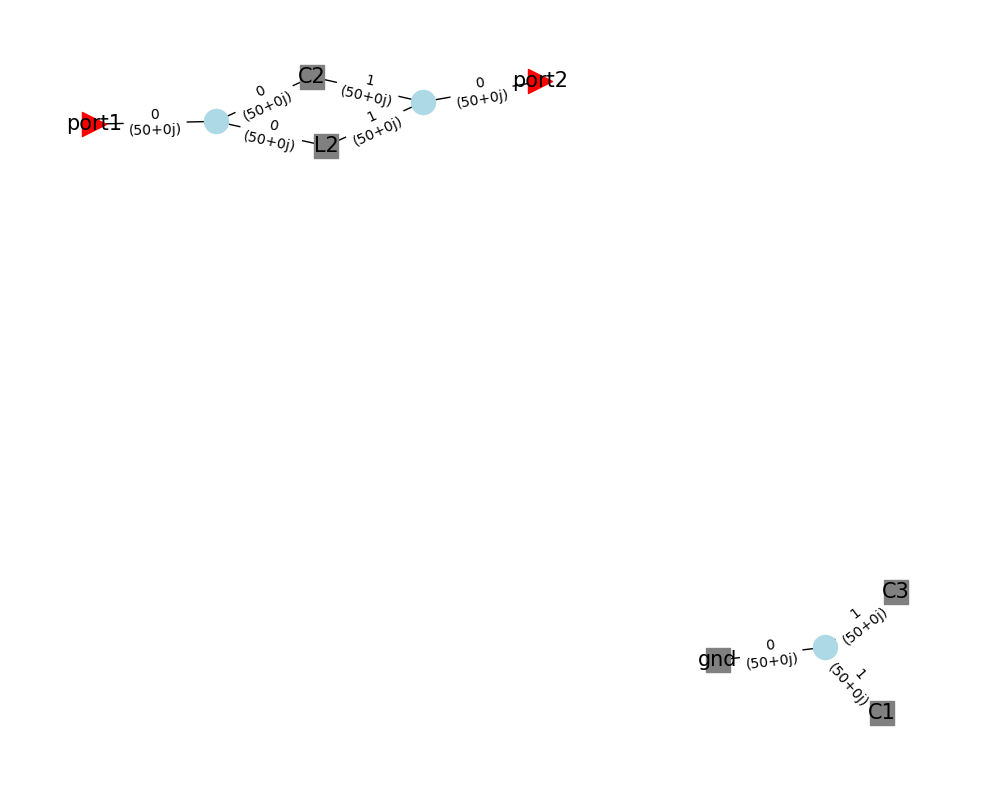

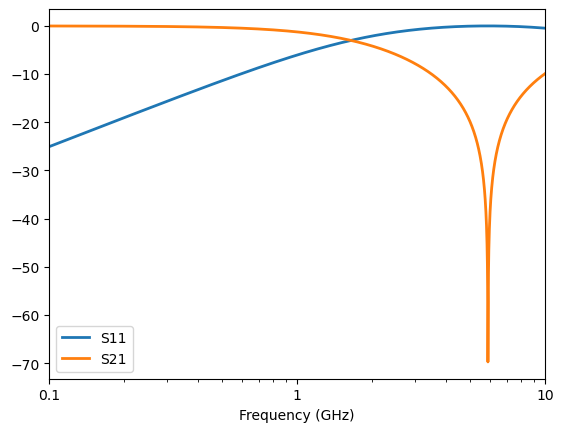

In [3]:
cir.plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=10)
plt.figure()
ntw.plot_s_db(m=0, n=0, lw=2, logx=True)
ntw.plot_s_db(m=1, n=0, lw=2, logx=True)

Bode plot


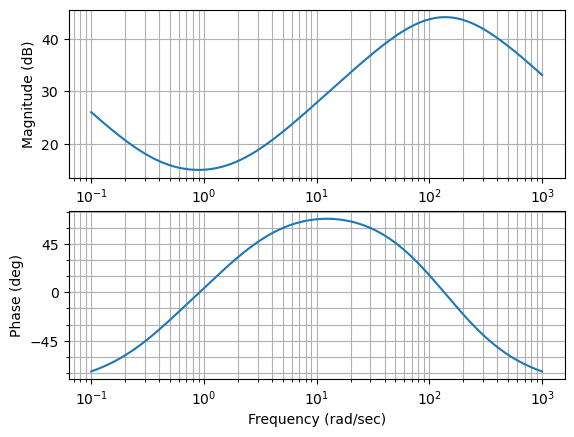

In [4]:
R1=510e3 
R2=10e3
C2=1e-6
C1=0.022e-6
R3=240e3
C3=10e-6
gain=-10
s = control.matlab.tf('s')
Y1 = 1/R1 + 1/(R2 + 1/(s*C2))
Z1 = 1/Y1
Y2 = 1/(R3 + 1/(s*C3)) + s*C1
Z2 = 1/Y2
H = -Z2/Z1*gain
_ss = control.tf2ss(H.num, H.den)
print('Bode plot')
control.bode(_ss)
plt.show()